# Walmart Sales Forecast: Notebook 2

### Problem Statement:

The dataset contains historical sales data for 45 Walmart stores located in different regions. Various events and holidays significantly impact daily sales. Walmart faces challenges due to unforeseen demand fluctuations and stockouts. This project aims to analyze the different attributes influencing sales and to develop accurate predictive models to forecast sales and demand, thereby improving inventory management and reducing stockouts.

### Objective of this Notebook:

#### Leveraging SQL for Data Analysis

**Steps for SQL Analysis:**

1. **Setup and Configuration**: 
   - Set up the SQL database and connect it to the Jupyter notebook using SQLAlchemy. 

2. **Data Loading into SQL Database**: 
   - Load the Walmart sales data into the SQL database. 

3. **Perform SQL Queries**: 
   - Execute SQL queries to analyze the data.

4. **Visualization of SQL Query Results**: 
   - Visualize the results of the SQL queries using matplotlib and seaborn.


##### Step 1: Setup and Configuration

In [3]:
# Import libraries & data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text 

file_path = '../data/Walmart_Store_sales.csv'
data = pd.read_csv(file_path)

# Creating an SQLite database and loading data from our dataset into it. (Route it to the database directory)
engine = create_engine('sqlite:///../database/walmart_sales.db')
data.to_sql('walmart_sales', con=engine, index=False, if_exists='replace')

6435

##### Step 2: Data Loading into SQL Database

In [4]:
# Verifying the table creation..
# Create a connection object from engine to execute SQL queries
with engine.connect() as conn:
    result = conn.execute(text("SELECT name FROM sqlite_master WHERE type='table';"))
    for row in result:
        print("Tables loaded into the database: ")
        print(row)

Tables loaded into the database: 
('walmart_sales',)


##### Step 3: Performing SQL Queries

1. Total Sales by Each Store

In [5]:
query = """
SELECT Store, SUM(Weekly_Sales) AS Total_Sales
FROM walmart_sales
GROUP BY Store
ORDER BY Total_Sales DESC;
"""
total_sales_by_store = pd.read_sql(query, con=engine)
print(total_sales_by_store)

    Store   Total_Sales
0      20  3.013978e+08
1       4  2.995440e+08
2      14  2.889999e+08
3      13  2.865177e+08
4       2  2.753824e+08
5      10  2.716177e+08
6      27  2.538559e+08
7       6  2.237561e+08
8       1  2.224028e+08
9      39  2.074455e+08
10     19  2.066349e+08
11     31  1.996139e+08
12     23  1.987506e+08
13     24  1.940160e+08
14     11  1.939628e+08
15     28  1.892637e+08
16     41  1.813419e+08
17     32  1.668192e+08
18     18  1.551147e+08
19     22  1.470756e+08
20     12  1.442872e+08
21     26  1.434164e+08
22     34  1.382498e+08
23     40  1.378703e+08
24     35  1.315207e+08
25      8  1.299512e+08
26     17  1.277821e+08
27     45  1.123953e+08
28     21  1.081179e+08
29     25  1.010612e+08
30     43  9.056544e+07
31     15  8.913368e+07
32      7  8.159828e+07
33     42  7.956575e+07
34      9  7.778922e+07
35     29  7.714155e+07
36     16  7.425243e+07
37     37  7.420274e+07
38     30  6.271689e+07
39      3  5.758674e+07
40     38  5.515

2. Average Weekly Sales During Holidays vs. Non-Holidays

In [6]:
query = """
SELECT Holiday_Flag, AVG(Weekly_Sales) AS Avg_Weekly_Sales
FROM walmart_sales
GROUP BY Holiday_Flag;
"""
avg_sales_holiday = pd.read_sql(query, con=engine)
print(avg_sales_holiday)

   Holiday_Flag  Avg_Weekly_Sales
0             0      1.041256e+06
1             1      1.122888e+06


3. Sales by Unemployment range

In [7]:
query_unemployment_range = """
WITH UnemploymentBins AS (
    SELECT
        CASE
            WHEN Unemployment < 5 THEN '<5'
            WHEN Unemployment BETWEEN 5 AND 7 THEN '5-7'
            WHEN Unemployment BETWEEN 7 AND 9 THEN '7-9'
            WHEN Unemployment BETWEEN 9 AND 11 THEN '9-11'
            WHEN Unemployment BETWEEN 11 AND 13 THEN '11-13'
            ELSE '>13'
        END AS Unemployment_Range,
        Weekly_Sales
    FROM walmart_sales
)

SELECT
    Unemployment_Range,
    AVG(Weekly_Sales) AS Avg_Weekly_Sales
FROM UnemploymentBins
GROUP BY Unemployment_Range
ORDER BY CASE
    WHEN Unemployment_Range = '<5' THEN 1
    WHEN Unemployment_Range = '5-7' THEN 2
    WHEN Unemployment_Range = '7-9' THEN 3
    WHEN Unemployment_Range = '9-11' THEN 4
    WHEN Unemployment_Range = '11-13' THEN 5
    ELSE 6
END;
"""

# Executing the query and storing it into a dataframe
sales_by_unemployment_range = pd.read_sql(query_unemployment_range, con=engine)
print(sales_by_unemployment_range)

  Unemployment_Range  Avg_Weekly_Sales
0                 <5      1.376176e+06
1                5-7      9.544728e+05
2                7-9      1.130279e+06
3               9-11      8.264171e+05
4              11-13      9.508859e+05
5                >13      8.912492e+05


4. Sales by Temperature Range

In [8]:
query = """
WITH TempBins AS (
    SELECT 
        CASE 
            WHEN Temperature < 30 THEN '<30'
            WHEN Temperature BETWEEN 30 AND 40 THEN '30-40'
            WHEN Temperature BETWEEN 40 AND 50 THEN '40-50'
            WHEN Temperature BETWEEN 50 AND 60 THEN '50-60'
            WHEN Temperature BETWEEN 60 AND 70 THEN '60-70'
            WHEN Temperature BETWEEN 70 AND 80 THEN '70-80'
            WHEN Temperature BETWEEN 80 AND 90 THEN '80-90'
            ELSE '>90'
        END AS Temp_Range,
        Weekly_Sales
    FROM walmart_sales
)
SELECT
    Temp_Range,
    AVG(Weekly_Sales) AS Avg_Weekly_Sales
FROM TempBins
GROUP BY Temp_Range
ORDER BY CASE
    WHEN Temp_Range = '<30' THEN 1
    WHEN Temp_Range = '30-40' THEN 2
    WHEN Temp_Range = '40-50' THEN 3
    WHEN Temp_Range = '50-60' THEN 4
    WHEN Temp_Range = '60-70' THEN 5
    WHEN Temp_Range = '70-80' THEN 6
    WHEN Temp_Range = '80-90' THEN 7
    ELSE 8
END;
"""

sales_by_temp = pd.read_sql(query, con=engine)
print(sales_by_temp)

  Temp_Range  Avg_Weekly_Sales
0        <30      1.017733e+06
1      30-40      1.127043e+06
2      40-50      1.113262e+06
3      50-60      1.037329e+06
4      60-70      1.056933e+06
5      70-80      1.061474e+06
6      80-90      9.720353e+05
7        >90      7.969660e+05


5. Top Performing Stores by Holiday and Non-Holiday Sales

In [9]:
# Top Performing Stores on weeks with holidays
query_holiday = """
SELECT Store, SUM(Weekly_Sales) AS Total_Holiday_Sales
FROM walmart_sales
WHERE Holiday_Flag = 1
GROUP BY Store
ORDER BY Total_Holiday_Sales DESC
LIMIT 5;
"""
top_holiday_stores = pd.read_sql(query_holiday, con=engine)
print("Top 5 highest weekly sales with holidays:\n",top_holiday_stores, '\n')

# Top Performing Stores on weeks without holidays
query_non_holiday = """
SELECT Store, SUM(Weekly_Sales) AS Total_Non_Holiday_Sales
FROM walmart_sales
WHERE Holiday_Flag = 0
GROUP BY Store
ORDER BY Total_Non_Holiday_Sales DESC
LIMIT 5;
"""
top_non_holiday_stores = pd.read_sql(query_non_holiday, con=engine)
print("Top 5 highest weekly sales without holidays:\n", top_non_holiday_stores)

Top 5 highest weekly sales with holidays:
    Store  Total_Holiday_Sales
0     20          22490350.81
1      4          22431026.24
2     14          21205829.98
3     10          21137559.49
4     13          21130438.06 

Top 5 highest weekly sales without holidays:
    Store  Total_Non_Holiday_Sales
0     20             2.789074e+08
1      4             2.771129e+08
2     14             2.677941e+08
3     13             2.653873e+08
4      2             2.545898e+08


### Visualisation

1. Total Sales by Store

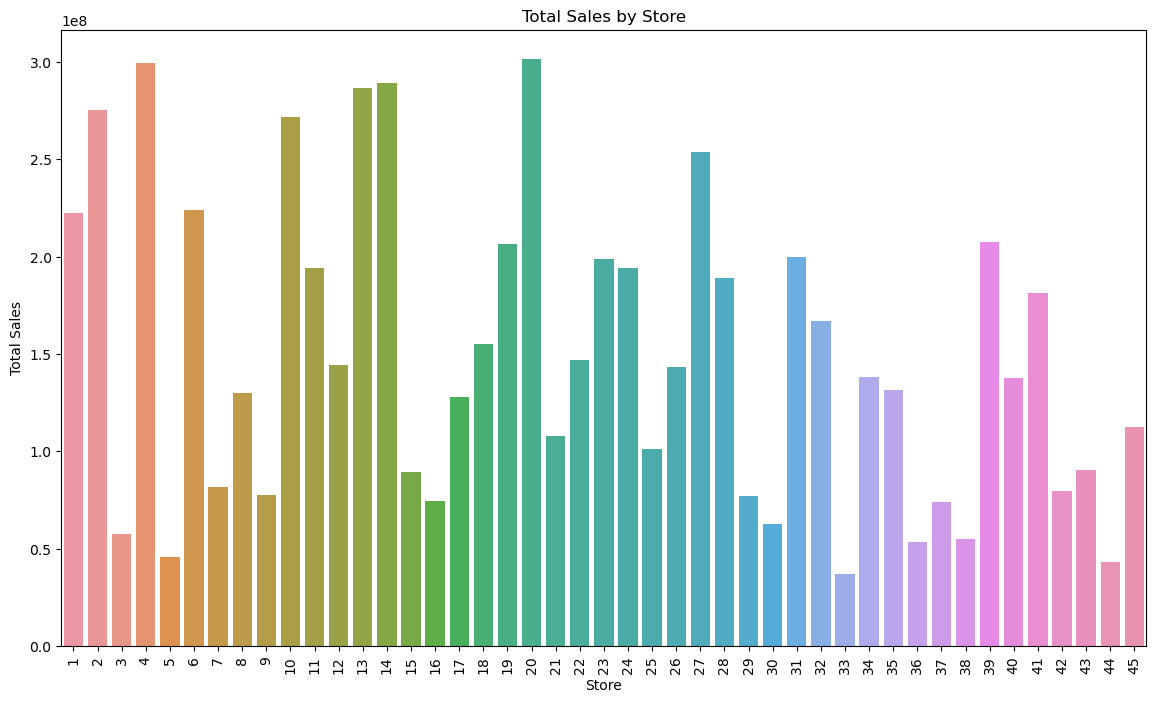

In [10]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Store', y='Total_Sales', data=total_sales_by_store)
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


2. Sales by Fuel price

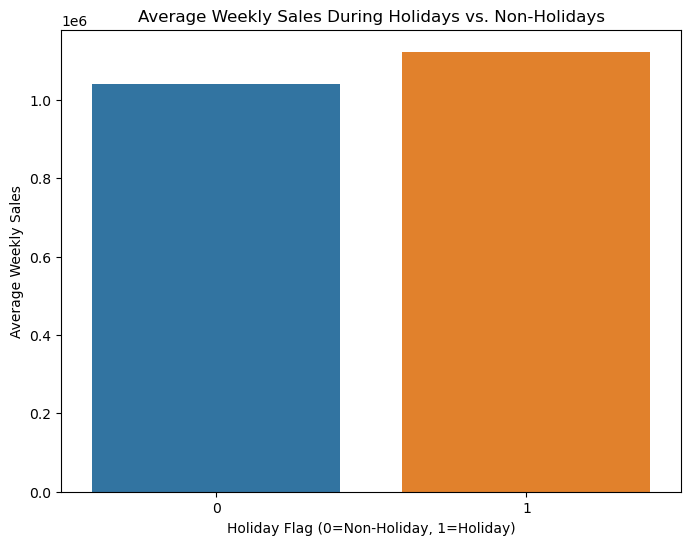

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Avg_Weekly_Sales', data=avg_sales_holiday)
plt.title('Average Weekly Sales During Holidays vs. Non-Holidays')
plt.xlabel('Holiday Flag (0=Non-Holiday, 1=Holiday)')
plt.ylabel('Average Weekly Sales')
plt.show()


3. Sales by Unemployment rate

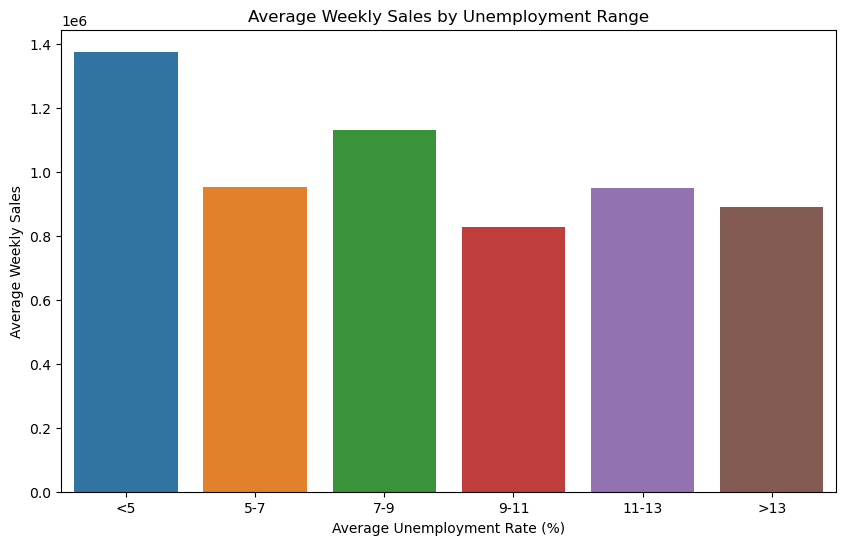

In [12]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Unemployment_Range', y='Avg_Weekly_Sales', data=sales_by_unemployment_range)
plt.title('Average Weekly Sales by Unemployment Range')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Average Weekly Sales')
plt.show()

4. Sales by Temperature Range

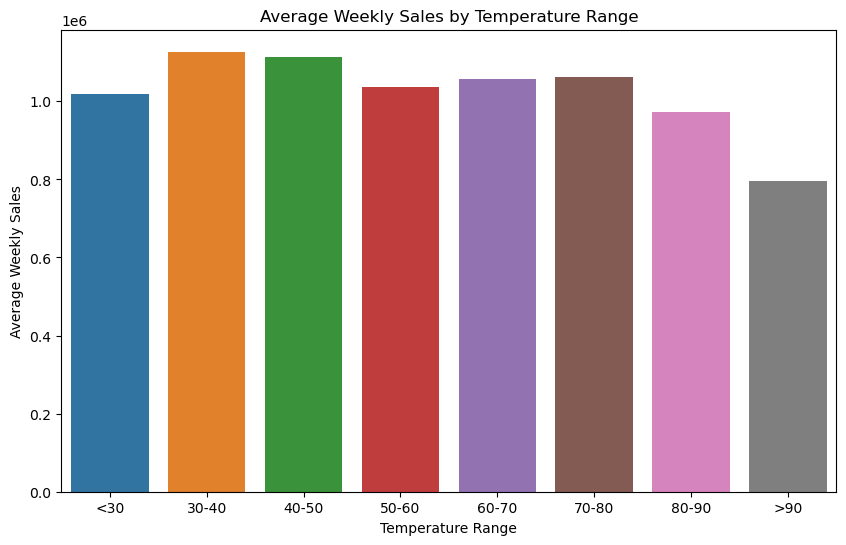

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Temp_Range', y='Avg_Weekly_Sales', data=sales_by_temp)
plt.title('Average Weekly Sales by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Weekly Sales')
plt.show()

We utilized SQL to perform in-depth data analysis on the data.

In the next notebook, we will focus on feature engineering and the development of a machine learning model to accurately predict demand. Accurately anticipating demand is crucial for Walmart's inventory management. Overestimating demand can lead to excessive inventory costs, while underestimating demand can result in stockouts and lost sales opportunities. By improving demand forecasting, Walmart can optimize inventory levels, reduce costs, and ensure better availability of products for customers.


#### Made by Hrishikesh Reddy Papasani
##### LinkedIn: https://www.linkedin.com/in/hrishikesh-reddy-papasani-02110725a/
##### Github: https://github.com/Hrishikesh-Papasani
##### Contact: hrpapasani@gmail.com